# Classification of Honye bee or Bumble bee from Images

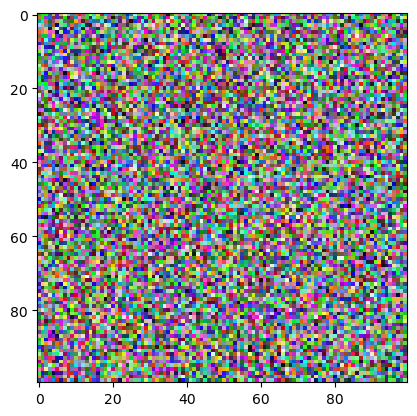

In [1]:
# Used to change filepaths
from pathlib import Path

# We set up matplotlib, pandas, and the display function
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd

import numpy as np

# import Image from PIL so we can use it later
from PIL import Image

# generate test_data
test_data=np.random.beta(a=1, b=1, size=(100, 100, 3))

# display the test_data
plt.imshow(test_data)

Pillow is a very flexible image loading and manipulation library. It works with many different image formats, for example, .png, .jpg, .gif and more. For most image data, one can work with images using the Pillow library (which is imported as PIL).

The image size is: (200, 200)


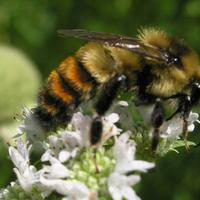

In [2]:
# open the image
img =Image.open('honey.jpg')

# Get the image size
img_size = img.size

print("The image size is: {}".format(img_size))

# Just having the image as the last line in the cell will display it in the notebook
img

### Image Augementation using crop, roate, transpost 

 img.crop() takes a tuple (left, upper, right, lower) as an argument, </br>
 img.rotate() takes an angle in degrees, </br>
 img.transpose() takes a method argument

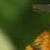

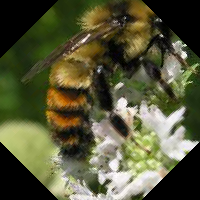

/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_2086/840682143.py:10: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  img_flipped = img.transpose(method=Image.FLIP_LEFT_RIGHT)


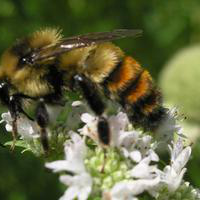

In [3]:
# Crop the image to 25, 25, 75, 75
img_cropped = img.crop((25, 25, 75, 75))
display(img_cropped)

# rotate the image by 45 degrees
img_rotated = img.rotate(45)
display(img_rotated)

# flip the image left to right
img_flipped = img.transpose(method=Image.FLIP_LEFT_RIGHT)
display(img_flipped)

#### Image as arrays of data

Our NumPy array has the shape: (200, 200, 3)


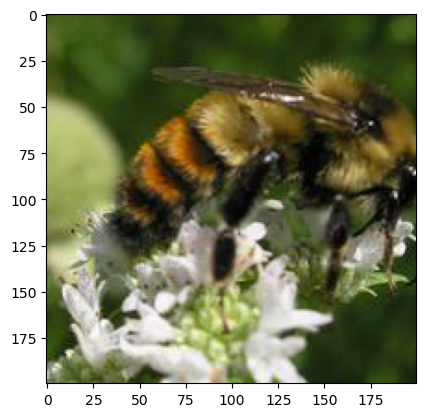

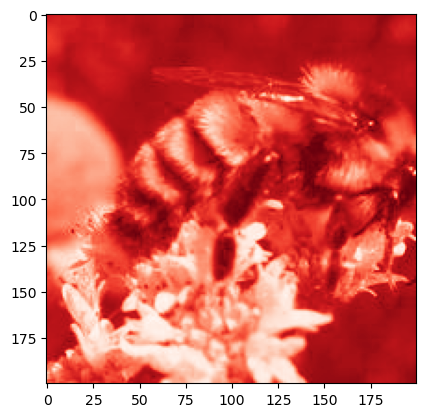

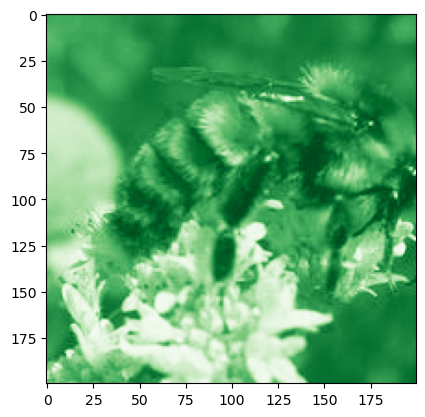

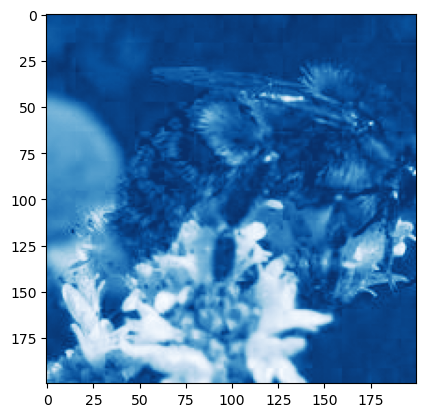

In [4]:
# Turn our image object into a NumPy array
img_data = np.array(img)

# get the shape of the resulting array
img_data_shape = img_data.shape

print("Our NumPy array has the shape: {}".format(img_data_shape))

# plot the data with `imshow` 
plt.imshow(img_data)
plt.show()

# plot the red channel
plt.imshow(img_data[:,:,0], cmap=plt.cm.Reds_r)
plt.show()

# plot the green channel
plt.imshow(img_data[:,:,1], cmap=plt.cm.Greens_r)
plt.show()

# plot the blue channel
plt.imshow(img_data[:,:,2], cmap=plt.cm.Blues_r)
plt.show()

#### Explore the color channels to understand the images.

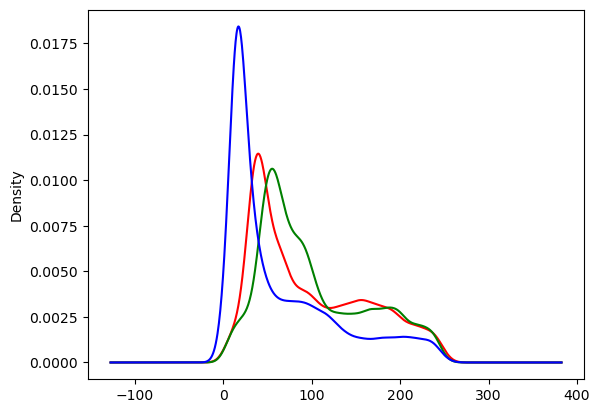

In [5]:
def plot_kde(channel, color):
    
    """ Plots a kernel density estimate for the given data.
        
        `channel` must be a 2d array
        `color` must be a color string, e.g. 'r', 'g', or 'b'
    """
    data = channel.flatten()
    return pd.Series(data).plot.density(c=color)

# create the list of channels
channels = ['r','g','b']
    
def plot_rgb(image_data):
    # use enumerate to loop over colors and indexes
    for ix, color in enumerate(channels):
        channel_data = image_data[:, :, ix]
        plot_kde(channel_data, color)

    plt.show()
    
plot_rgb(img_data)

#### Comparison of two bees (1. Honey, 2. Bumble)

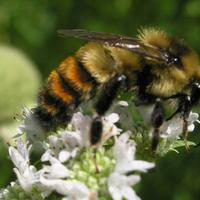

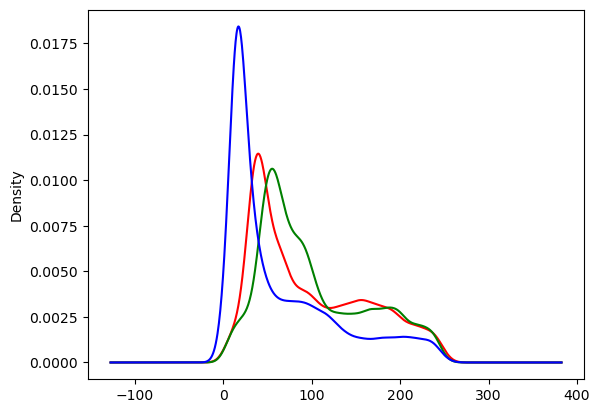

In [6]:
# load bee_12.jpg as honey
honey =Image.open('honey.jpg')

# display the honey bee image
display(honey)

# NumPy array of the honey bee image data
honey_data = np.array(honey)

# plot the rgb densities for the honey bee image
plot_rgb(honey_data)

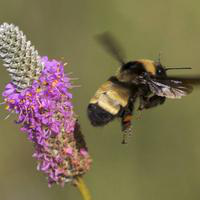

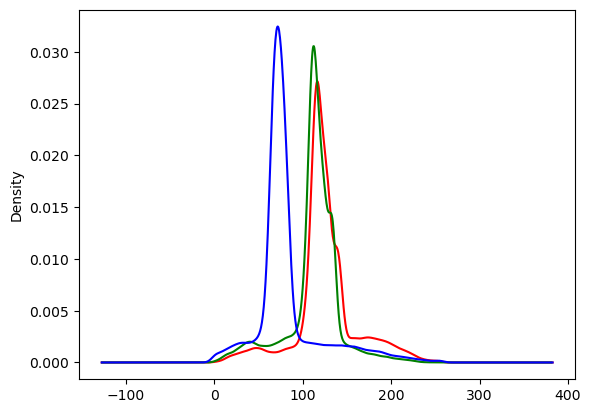

In [7]:
# load bee_3.jpg as bumble
bumble = Image.open('bumble.jpg')

# display the bumble bee image
display(bumble)

# NumPy array of the bumble bee image data
bumble_data = np.array(bumble)

# plot the rgb densities for the bumble bee image
plot_rgb(bumble_data)

#### Convert the color to greyscale
As the bees and flowers are all similar color, convert them to greyscale images to avoid the distraction. </br>
Note! the channels number has been changed

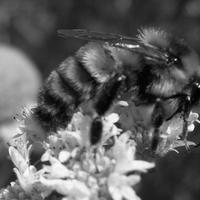

Our NumPy array has the shape: (200, 200)


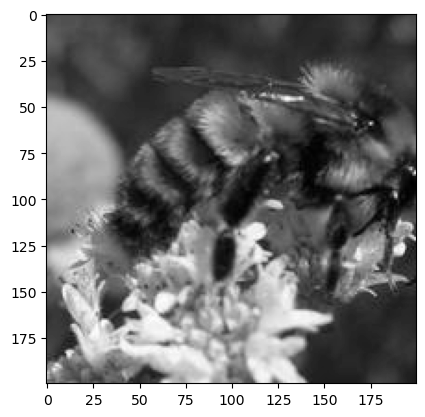

<AxesSubplot: ylabel='Density'>

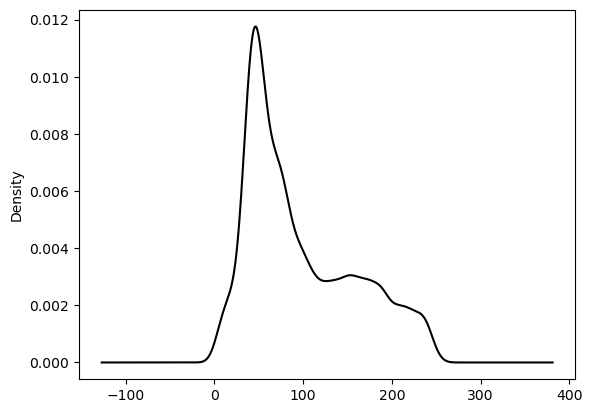

In [8]:
# load bee_12.jpg as honey
honey = Image.open('honey.jpg')

# convert honey to grayscale
honey_bw = honey.convert("L")
display(honey_bw)

# convert the image to a NumPy array
honey_bw_arr = np.array(honey_bw)

# get the shape of the resulting array
honey_bw_arr_shape = honey_bw_arr.shape
print("Our NumPy array has the shape: {}".format(honey_bw_arr_shape))

# plot the array using matplotlib
plt.imshow(honey_bw_arr, cmap=plt.cm.gray)
plt.show()

# plot the kde of the new black and white array
plot_kde(honey_bw_arr, 'k')

Save the image after...</br>
1. Flip the image left-to-right </br>
2. clipping - by usin np.maximum function (smaller than 100, replace with 100) to reduce the range of values (Increase Image contrast) 

/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_2086/1667812588.py:2: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  honey_bw_flip = honey_bw.transpose(method=Image.FLIP_LEFT_RIGHT)


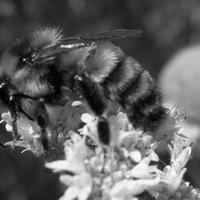

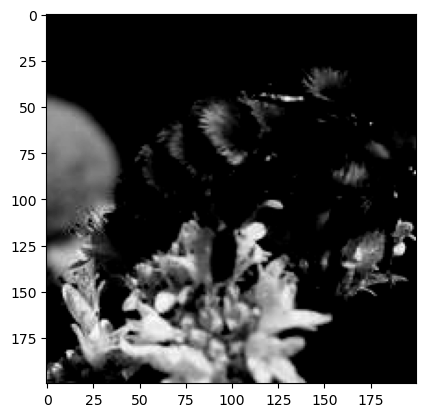

In [9]:
# flip the image left-right with transpose
honey_bw_flip = honey_bw.transpose(method=Image.FLIP_LEFT_RIGHT)

# show the flipped image
display(honey_bw_flip)

# save the flipped image
honey_bw_flip.save('bw_flipped.jpg')

# create higher contrast by reducing range
honey_hc_arr = np.maximum(honey_bw_arr, 100)

# show the higher contrast version
plt.imshow(honey_hc_arr, cmap=plt.cm.gray)

# convert the NumPy array of high contrast to an Image
honey_bw_hc = Image.fromarray(honey_hc_arr)

# save the high contrast version
honey_bw_hc.save('bw_hc.jpg')

### Making a Pipeline

In [13]:
image_paths = ['bee_1.jpg', 'bee_2.jpg', 'bee_2.jpg', 'bee_4.jpg']

def process_image(path):
    img = Image.open(path)

    # create paths to save files to
    bw_path = "bw_{}.jpg".format(path.stem)
    rcz_path = "rcz_{}.jpg".format(path.stem)

    print("Creating grayscale version of {} and saving to {}.".format(path, bw_path))
    bw = img.convert("L")
    bw.save(bw_path)

    print("Creating rotated, cropped, and zoomed version of {} and saving to {}.".format(path, rcz_path))
    rcz = img.crop((25,25,75,75)).rotate(45).resize((100,100))
    rcz.save(rcz_path)

# for loop over image paths
for img_path in image_paths:
    process_image(Path(img_path))

Creating grayscale version of bee_1.jpg and saving to bw_bee_1.jpg.
Creating rotated, cropped, and zoomed version of bee_1.jpg and saving to rcz_bee_1.jpg.
Creating grayscale version of bee_2.jpg and saving to bw_bee_2.jpg.
Creating rotated, cropped, and zoomed version of bee_2.jpg and saving to rcz_bee_2.jpg.
Creating grayscale version of bee_2.jpg and saving to bw_bee_2.jpg.
Creating rotated, cropped, and zoomed version of bee_2.jpg and saving to rcz_bee_2.jpg.
Creating grayscale version of bee_4.jpg and saving to bw_bee_4.jpg.
Creating rotated, cropped, and zoomed version of bee_4.jpg and saving to rcz_bee_4.jpg.
